In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt


In [5]:
#read in raw data.  File from online did not have country index like github jupyter notebook showed
df = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean2.csv')
df.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#set index t country name
#data = data.set_index('CountryName')

In [7]:
# Create new dataframe with the 12 countries of interest
#countries = data.loc[["Brazil", "Canada", "China", "Germany", "Italy", "Japan", \
                             "New Zealand", "South Korea", "Sweden", "United Kingdom", "United States"]]
#df = pd.DataFrame(countries, columns=["Date", "E1_Income support", "E3_Fiscal measures","E4_International support", \
                                                "ConfirmedCases", "ConfirmedDeaths"])
#df = df.reset_index()
#df.head()

IndentationError: unexpected indent (<ipython-input-7-35eb58795797>, line 3)

In [8]:
#df.to_csv("output_data/df_economic2.csv", index=False)

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df['CountryName'].unique()

array(['Brazil', 'Canada', 'China', 'Germany', 'United Kingdom', 'Italy',
       'Japan', 'South Korea', 'New Zealand', 'Sweden', 'United States'],
      dtype=object)

In [11]:
#for loop to determine when income support was provided and what level.
#steps for for loop below to get to first government report of income support.
brazil = df.loc[df['CountryName']=='Brazil']

In [12]:
brazil.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
brazil_e = brazil.loc[brazil['E1_Income support']==1]
brazil_e

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
92,Brazil,2020-04-02,3.0,3.0,1.0,1.0,125175000.0,2.0,6836.0,241.0
93,Brazil,2020-04-03,3.0,3.0,1.0,1.0,0.0,2.0,7910.0,299.0
94,Brazil,2020-04-04,3.0,3.0,1.0,1.0,0.0,2.0,9056.0,359.0
95,Brazil,2020-04-05,3.0,3.0,1.0,1.0,0.0,2.0,10278.0,432.0
96,Brazil,2020-04-06,3.0,3.0,1.0,1.0,0.0,2.0,11130.0,486.0
...,...,...,...,...,...,...,...,...,...,...
297,Brazil,2020-10-24,3.0,2.0,2.0,1.0,0.0,4.0,5353656.0,156471.0
298,Brazil,2020-10-25,3.0,2.0,2.0,1.0,0.0,4.0,5380635.0,156903.0
299,Brazil,2020-10-26,3.0,2.0,2.0,1.0,0.0,4.0,5394128.0,157134.0
300,Brazil,2020-10-27,3.0,2.0,2.0,1.0,0.0,4.0,5409854.0,157397.0


In [18]:
df_a = df.loc[(df['E1_Income support']==1)]
df_b = df.loc[(df['E1_Income support']==2)]

In [19]:
df_a

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
92,Brazil,2020-04-02,3.0,3.0,1.0,1.0,125175000.0,2.0,6836.0,241.0
93,Brazil,2020-04-03,3.0,3.0,1.0,1.0,0.0,2.0,7910.0,299.0
94,Brazil,2020-04-04,3.0,3.0,1.0,1.0,0.0,2.0,9056.0,359.0
95,Brazil,2020-04-05,3.0,3.0,1.0,1.0,0.0,2.0,10278.0,432.0
96,Brazil,2020-04-06,3.0,3.0,1.0,1.0,0.0,2.0,11130.0,486.0
...,...,...,...,...,...,...,...,...,...,...
2418,South Korea,2020-10-25,2.0,2.0,1.0,1.0,0.0,2.0,25836.0,457.0
2419,South Korea,2020-10-26,2.0,2.0,1.0,1.0,0.0,2.0,25955.0,457.0
2420,South Korea,2020-10-27,2.0,2.0,1.0,1.0,0.0,2.0,26043.0,460.0
2421,South Korea,2020-10-28,2.0,2.0,1.0,1.0,0.0,2.0,26146.0,461.0


In [21]:
df_a['CountryName'].value_counts()

Italy          220
South Korea    214
Brazil         210
China          202
Japan          201
Name: CountryName, dtype: int64

In [20]:
df_b

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
376,Canada,2020-03-15,0.0,0.0,1.0,2.0,0.0,0.0,244.0,1.0
377,Canada,2020-03-16,3.0,0.0,1.0,2.0,0.0,0.0,304.0,1.0
378,Canada,2020-03-17,3.0,0.0,1.0,2.0,0.0,0.0,424.0,4.0
379,Canada,2020-03-18,3.0,3.0,1.0,2.0,367000000.0,0.0,569.0,8.0
380,Canada,2020-03-19,3.0,3.0,1.0,2.0,0.0,0.0,690.0,9.0
...,...,...,...,...,...,...,...,...,...,...
3314,United States,2020-10-21,3.0,2.0,2.0,2.0,0.0,4.0,8273304.0,221066.0
3315,United States,2020-10-22,3.0,2.0,2.0,2.0,0.0,4.0,8336282.0,222201.0
3316,United States,2020-10-23,3.0,2.0,2.0,2.0,0.0,4.0,8408340.0,223042.0
3317,United States,2020-10-24,3.0,2.0,2.0,2.0,0.0,4.0,8493669.0,223995.0


In [22]:
df_b['CountryName'].value_counts()

Sweden            231
Canada            229
New Zealand       229
Germany           228
United Kingdom    227
United States     212
Name: CountryName, dtype: int64

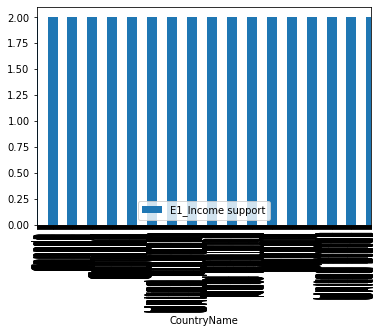

In [27]:
#df = df.drop_duplicates(keep='first')

In [18]:
#df.dropna()

,CountryName,Date,E1_Income support,E3_Fiscal measures,E4_International support,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20146,United States,2020-08-02,1.0,0.0,0.0,2808.0,26.0
20147,United States,2020-08-03,1.0,0.0,0.0,2848.0,27.0
20148,United States,2020-08-04,1.0,0.0,0.0,2884.0,27.0
20149,United States,2020-08-05,1.0,0.0,0.0,2923.0,27.0


In [25]:
#df[df['CountryName']=='United States']['Date'].min()

Timestamp('2020-01-01 00:00:00')

Timestamp('2020-10-28 00:00:00')